In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sqlalchemy import create_engine
import seaborn as sns
from scipy.stats import boxcox
from scipy import stats
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


In [3]:
clean_df = df.copy()
clean_df.alley.unique()
clean_df.alley.fillna('None', inplace=True)
clean_df.lotfrontage.fillna(0, inplace=True)

In [4]:
clean_df.masvnrtype.fillna('None', inplace=True)
clean_df.masvnrarea.fillna(0.0, inplace=True)
clean_df.bsmtqual.fillna('NA', inplace=True)
clean_df.bsmtcond.fillna('NA', inplace=True)
clean_df.bsmtexposure.fillna('NA', inplace=True)
clean_df.bsmtfintype1.fillna('NA', inplace=True)
clean_df.bsmtfintype2.fillna('NA', inplace=True)
clean_df.bsmtexposure.fillna('NA', inplace=True)
clean_df.electrical.fillna('SBrkr', inplace=True)
clean_df.fireplacequ.fillna('NA', inplace=True)
clean_df.garagetype.fillna('NA', inplace=True)
clean_df.garageyrblt.fillna('NA', inplace=True)
clean_df.garagefinish.fillna('NA', inplace=True)
clean_df.garagequal.fillna('NA', inplace=True)
clean_df.garagecond.fillna('NA', inplace=True)
clean_df.poolqc.fillna('NA', inplace=True)
clean_df.fence.fillna('NA', inplace=True)
clean_df.miscfeature.fillna('NA', inplace=True)

In [5]:
feature_df = clean_df[['lotarea', 'overallqual']].copy()

In [6]:
bldgtype_list = []
for i in df.bldgtype:
    if i == '2fmCon':
        bldgtype_list.append('Duplex')
    else:
        bldgtype_list.append(i)
clean_df['bldgtype'] = bldgtype_list
x = pd.get_dummies(clean_df.bldgtype, drop_first=True).copy()
for i in range(len(clean_df.bldgtype.unique()) - 1):
    feature_df['bldgtype' + clean_df.bldgtype.unique()[i + 1]] = x.iloc[:,i]

In [7]:
keywords = ['garagequal', 'kitchenqual', 'bsmtcond', 'bsmtqual', 'exterqual' ]
for word in keywords:
    nums = []
    for row in clean_df[word]:
        if row == 'Fa':
            nums.append(1)
        elif row == 'TA':
            nums.append(2)
        elif row == 'Gd':
            nums.append(3)
        elif row == 'Ex':
            nums.append(4)
        else:
            nums.append(0)
    feature_df[word] = nums
    

In [8]:
feature_df[['garagecars', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd', 'fireplaces', 'bsmtfinsf1', 'wooddecksf', 'secondflrsf']] = clean_df[['garagecars', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd', 'fireplaces', 'bsmtfinsf1', 'wooddecksf', 'secondflrsf']]

In [9]:
feature_df['logsaleprice'] = winsorize(np.log(clean_df.saleprice), (0.01, 0.02))

In [10]:
Y = feature_df['logsaleprice']
X = feature_df.iloc[:, :-1]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     435.7
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:32:35   Log-Likelihood:                 757.85
No. Observations:                1460   AIC:                            -1474.
Df Residuals:                    1439   BIC:                            -1363.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0320      0.580      6.949      0.000       2.894       5.170
lotarea         1.951e-06   4.21e-07      4.635      0.000    1.13e-06    2.78e-06
overallqual        0.0725      0.005     13.903      0.000       0.062       0.083
bldgtypeDuplex    -0.0415      0.019     -2.243      0.025      -0.078      -0.005
bldgtypeTwnhsE    -0.1675      0.024     -7.106      0.000      -0.214      -0.121
bldgtypeTwnhs     -0.0841      0.016     -5.348      0.000      -0.115      -0.053
garagequal         0.0354      0.009      3.760      0.000       0.017       0.054
kitchenqual        0.0402      0.009      4.352      0.000       0.022       0.058
bsmtcond           0.0529      0.011      4.882      0.000       0.032       0.074
bsmtqual           0.0208      0.009      2.409      0.016       0.004       0.038
exterqual          0.0243      0.011      2.143      0.032       0.002       0.047
garagecars         0.0522      0.008      6.416      0.000       0.036       0.068
firstflrsf         0.0002   1.95e-05      9.447      0.000       0.000       0.000
fullbath           0.0195      0.011      1.847      0.065      -0.001       0.040
totrmsabvgrd       0.0118      0.004      2.623      0.009       0.003       0.021
yearbuilt          0.0016      0.000      7.429      0.000       0.001       0.002
yearremodadd       0.0018      0.000      6.720      0.000       0.001       0.002
fireplaces         0.0560      0.007      7.791      0.000       0.042       0.070
bsmtfinsf1      6.204e-05   1.01e-05      6.140      0.000    4.22e-05    8.19e-05
wooddecksf         0.0001   3.26e-05      3.551      0.000    5.18e-05       0.000
secondflrsf        0.0001   1.69e-05      7.899      0.000       0.000       0.000
==============================================================================
Omnibus:                     1023.984   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53517.484
Skew:                          -2.660   Prob(JB):                         0.00
Kurtosis:                      32.179   Cond. No.                     2.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
Y = feature_df['logsaleprice']
X = feature_df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 21)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     359.6
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:32:35   Log-Likelihood:                 623.69
No. Observations:                1168   AIC:                            -1205.
Df Residuals:                    1147   BIC:                            -1099.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.2698      0.649      6.581      0.000       2.997       5.543
lotarea         2.019e-06   4.73e-07      4.269      0.000    1.09e-06    2.95e-06
overallqual        0.0693      0.006     12.006      0.000       0.058       0.081
bldgtypeDuplex    -0.0373      0.020     -1.884      0.060      -0.076       0.002
bldgtypeTwnhsE    -0.1700      0.026     -6.565      0.000      -0.221      -0.119
bldgtypeTwnhs     -0.0856      0.018     -4.837      0.000      -0.120      -0.051
garagequal         0.0431      0.010      4.136      0.000       0.023       0.063
kitchenqual        0.0430      0.010      4.117      0.000       0.023       0.064
bsmtcond           0.0540      0.012      4.533      0.000       0.031       0.077
bsmtqual           0.0240      0.010      2.486      0.013       0.005       0.043
exterqual          0.0271      0.013      2.161      0.031       0.003       0.052
garagecars         0.0487      0.009      5.531      0.000       0.031       0.066
firstflrsf         0.0002   2.19e-05      9.146      0.000       0.000       0.000
fullbath           0.0234      0.012      1.982      0.048       0.000       0.046
totrmsabvgrd       0.0093      0.005      1.876      0.061      -0.000       0.019
yearbuilt          0.0015      0.000      6.651      0.000       0.001       0.002
yearremodadd       0.0017      0.000      5.811      0.000       0.001       0.002
fireplaces         0.0494      0.008      6.220      0.000       0.034       0.065
bsmtfinsf1      6.216e-05   1.11e-05      5.604      0.000    4.04e-05    8.39e-05
wooddecksf         0.0001   3.57e-05      3.369      0.001    5.03e-05       0.000
secondflrsf        0.0002   1.88e-05      8.156      0.000       0.000       0.000
==============================================================================
Omnibus:                      901.782   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62920.666
Skew:                          -2.958   Prob(JB):                         0.00
Kurtosis:                      38.467   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

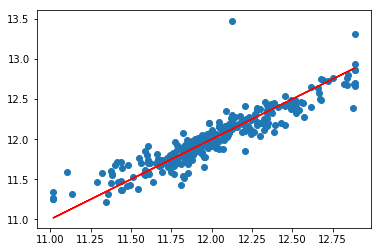

Mean absolute error of the prediction is: 0.10265506684939546
Mean squared error of the prediction is: 0.023468093494515372
Root mean squared error of the prediction is: 0.1531929942736135
Mean absolute percentage error of the prediction is: 0.8569558463880701


In [12]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [17]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 21)
    
ridgeregr = Ridge(alpha=3) 
ridgeregr.fit(X_train, y_train)
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.8623931545014548
-----Test set statistics-----
R-squared of the model on the test set is: 0.8393068229640528
Mean absolute error of the prediction is: 0.10261852248964232
Mean squared error of the prediction is: 0.023470676232919794
Root mean squared error of the prediction is: 0.15320142373006784
Mean absolute percentage error of the prediction is: 0.8566697537754403


In [31]:
lassoregr = Lasso(alpha=.01) 
lassoregr.fit(X_train, y_train)

y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
# Makes my model worse for every alpha

R-squared of the model on the training set is: 0.8423058823713512
-----Test set statistics-----
R-squared of the model on the test set is: 0.8219998824656616
Mean absolute error of the prediction is: 0.10606371189993687
Mean squared error of the prediction is: 0.025998509738441176
Root mean squared error of the prediction is: 0.16124053379482833
Mean absolute percentage error of the prediction is: 0.8848469754314078


In [54]:
elasticregr = ElasticNet(alpha=.1, l1_ratio=.01) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.8550309545749879
-----Test set statistics-----
R-squared of the model on the test set is: 0.8314186872846339
Mean absolute error of the prediction is: 0.10394740592206374
Mean squared error of the prediction is: 0.02462280902429257
Root mean squared error of the prediction is: 0.15691656708038373
Mean absolute percentage error of the prediction is: 0.8675974987765808


In [ ]:
# Ridge score is best with alpha near 3. Not overfitting, and also a high R score. It's a subset of ElasticNet
# So i could find the parameters that match it but adding lasso seems to only negatively impact.